# Plotting RNAseq results with R

**Feel free to tryout editing the commands you use below, you cannot break anything. The idea of this short introduction to R is to give you an idea of how scientific programming and the analyses of large data sets are done.**


This script is prepared so that you can simply execute every command by clicking on the little play button at the top of this window. The sections shown with a grey background and marked with a `[ ]` on the left side are the actual code chunks that contain code written in the R programming language. If you want to change the code, just click into it and start writing. 

We have added comments to a lot of the code. These comments always start with a `#` and they are not written in the R programming language but are just some explanations of what is happening.  

As a very first simple example, excecute the code below by clicking on it and then clicking on the play button above.

If that worked, you should see a `4` being printed below the code. Now try changin the code below to calculate the sum of `5+5` instead of `2+2`. 

In [11]:
2+2


[1] 4

Now, you can also store the results of the calculation in a new object. In R, this is done with the `<-` operator. So, the code below stores the output of the calculation `2+2` in the object `random.name.you.can.choose`.

In [ ]:
random.name.you.can.choose <- 2+2

From now on, the object `random.name.you.can.choose` holds the information from the above calculation, as shown by the code below.

In [ ]:
random.name.you.can.choose # this returns the output of 2+2

random.name.you.can.choose*random.name.you.can.choose # this should return 16, because it mutiplies (2+2)*(2+2)

Try editing the above name of the `random.name.you.can.choose` object to something else. 


Creating plots in R is really simple. The code below will generate a barplot of the object `random.name.you.can.choose`. This plot doesn't make much sense, but it illustrates how easy you can create plots using R. 

In [ ]:
barplot(random.name.you.can.choose)

If that worked, you can now go on and start loading, reorganizing and plotting the RNAseq gene expression data from the practical. 

## Load the data

To start, we will load the expression data from the practical into R. We store the data in a data frame that we call `df`, so we can manipulate the data in our R environment. In preparation for this practical, we have uploaded the expression data to google spreadsheets from which you can retrieve the data using the function `read.csv()` (a `csv` file is a *"character-separated-variable"* file). 

In [1]:
df<-read.csv("https://docs.google.com/spreadsheets/d/e/2PACX-1vTx0wPDq4HaOj6W51nimQtKkXz21x4p-JO27JnUMputmWnUb-Tem6HB9K_H3R01CubhlkfdSeVg5gYQ/pub?gid=2031264463&single=true&output=tsv",sep="\t",dec = ".") 
df$sign<-ifelse(df$p.value.T.test.<0.000401862,"sign.","non-sign.") # define a binary variable depending on whether or not a gene is significant at FDR<0.05

Have a look how this looks by using the `head()` function. This function prints the first few lines of an object to the screen. If you want to see only the first 2 lines, try changing the function below to `head(df,2)`.

In [2]:
head(df)

,gene,Queen.Mean,Queen.Median,Larva.Mean,Larva.Median,Overall.Mean,Overall.Median,Fold.Change,log2.FC.,p.value.T.test.,significance..p.0.05.,significance..FDR.0.05.,Mean..q.0.05.,logFC..q.0.05.,sign
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<dbl>,<dbl>,<chr>
1,WEOB_001,2204.93,2259.31,2342.57,2085.13,2273.75,2172.22,0.941,-0.087,0.728657,,,0.00,0.00,non-sign.
2,WEOB_002,2385.73,2152.79,1693.87,1587.24,2039.80,1870.01,1.408,0.494,0.034347,*,,0.00,0.00,non-sign.
3,WEOB_003,1124.67,1031.30,649.54,364.33,887.10,697.82,1.731,0.792,0.202983,,,0.00,0.00,non-sign.
4,WEOB_004,3296.11,3002.35,2573.64,2523.69,2934.88,2763.02,1.281,0.357,0.072232,,,0.00,0.00,non-sign.
5,WEOB_005,3163.27,3023.72,2896.15,2979.92,3029.71,3001.82,1.092,0.127,0.526151,,,0.00,0.00,non-sign.
6,WEOB_006,5015.69,4899.15,3849.48,3809.99,4432.59,4354.57,1.303,0.382,0.000065,*,***,4432.59,0.38,sign.


In addition, we load the FPKM values for all genes, also using the `read.csv()` function. 

In [3]:
df.fpkm<-read.csv("https://docs.google.com/spreadsheets/d/e/2PACX-1vTx0wPDq4HaOj6W51nimQtKkXz21x4p-JO27JnUMputmWnUb-Tem6HB9K_H3R01CubhlkfdSeVg5gYQ/pub?gid=1658065490&single=true&output=tsv",sep="\t",dec = ".")

In [4]:
head(df.fpkm)

,gene,Queen1,Queen2,Queen3,Queen4,Queen5,Queen6,Queen7,Larva1,Larva2,Larva3,Larva4,Larva5,Larva7,X,Gene.length
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<lgl>,<int>
1,WEOB_001,2331.51,2021.06,2259.31,2053.76,1856.24,2593.59,2319.06,2080.79,1768.84,2132.81,2089.47,4146.64,1836.85,NA,1901
2,WEOB_002,2535.76,2285.62,1817.20,2813.40,2152.79,3297.30,1798.01,1292.43,1457.42,1219.61,1954.25,1717.06,2522.43,NA,824
3,WEOB_003,1324.63,1040.18,1031.30,1523.52,877.89,1470.39,604.78,477.42,251.24,869.97,0.00,211.42,2087.18,NA,239
4,WEOB_004,3691.26,2885.14,3002.35,3598.18,2651.44,4430.46,2813.96,3236.97,2171.86,2875.51,2055.71,3332.87,1768.92,NA,470
5,WEOB_005,3207.44,2628.92,3618.61,3430.96,2946.41,3286.82,3023.72,2354.85,3604.99,1950.49,3826.87,1896.08,3743.61,NA,533
6,WEOB_006,5187.92,4899.15,5494.15,5251.71,4331.68,5170.68,4774.55,3729.82,3912.65,3890.15,4363.41,3553.44,3647.40,NA,1550


## Plotting
### MA plot

For plotting, we load some publicly available functions that are great for plotting. Check out [this introduction here](http://r-statistics.co/Complete-Ggplot2-Tutorial-Part1-With-R-Code.html), if you want to learn more about plotting in R. Now, we will plot the MA plot using the function `ggplot()` and other functions of the `ggplot2` library. For this, we first need to load the library by entering `library(ggplot2)`. 

Try chaning the color of the dots by changing the expression `c("grey60","red")` to for example `c("green","pink")`. Or try changing the size of the dots by editing `size=3` to `size=10`.

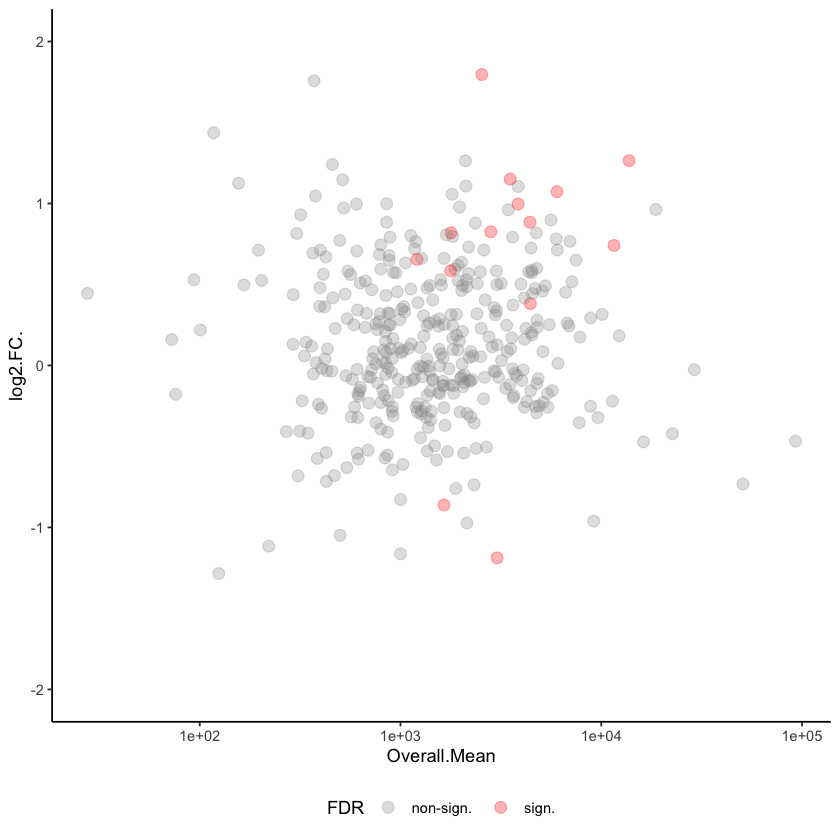

In [5]:
library(ggplot2) # load ggplot2

ggplot(data=df)+                                           # initiate the plot and use the data frame df as the input data for plotting
geom_point(mapping =                                       # define what kind of plot you want to create
                     aes(x=Overall.Mean,                   # define what should be plotted at the x-axis
                         y=log2.FC.,                       # define what should be plotted at the y-axis
                         col=sign),                         # define how the points should be colored                             
           alpha=.3,                                       # set the visibility of each point to 30 %
           size=3)+                                        # define the size of each point to be 
scale_x_log10()+                                           # scale the x-axis logarithmically
theme_classic()+                                           # define the basic design of the plot
scale_color_manual(values = c("grey60","red"),name="FDR")+  # define the colors to use
theme(legend.position = "bottom")+                          # set the legend to be plotted to the bottom
coord_cartesian(ylim=c(-2,2))                              # set the range of the y-axis

### Boxplots 

Now, to visualize how different the 14 significan genes really are expressed across all the queen and larva samples, we will create boxplots. 
For this, we first need to transform the `df.fpkm` data frame to a so-called *long format*, using the function `melt()` from the `reshape2` library. We need to reorganize the data so the plotting function from ggplot can read the data properly. This is a relatively complex step, so feel free to not try understanding what's happening here. 

In [6]:
library(reshape2) # load library for reorganizing the data with the melt() function
long.df.fpkm <- melt(df.fpkm, id.vars = c("gene", "X","Gene.length"))
long.df.fpkm$Group<-substr(long.df.fpkm$variable,1,5)


Next, we create two subsetted data frames: One containing only the **significant genes** (we call this dataframe `long.df.fpkm.significant`) and another containing 14 **random genes** (we call this dataframe `long.df.fpkm.random`).

In [7]:
# significant genes
significant.genes           <- df$gene[df$p.value.T.test.<0.000401862]          # We subset based on the the FDR-corrected p-value cutoff that we calculated in the practical
long.df.fpkm.significant    <- subset(long.df.fpkm,gene %in% significant.genes) # this dataframe here contains the expression values (as FPKM) from the significantly different genes

# random genes
random.genes                <- sample(df$gene,size = 14,replace = F)
long.df.fpkm.random         <- subset(long.df.fpkm,gene %in% random.genes)      # this dataframe here contains the expression values (as FPKM) from 14 random genes

Finally, we plot the FPKM values for all significantly different genes as boxplots for queens and larvae separately. 

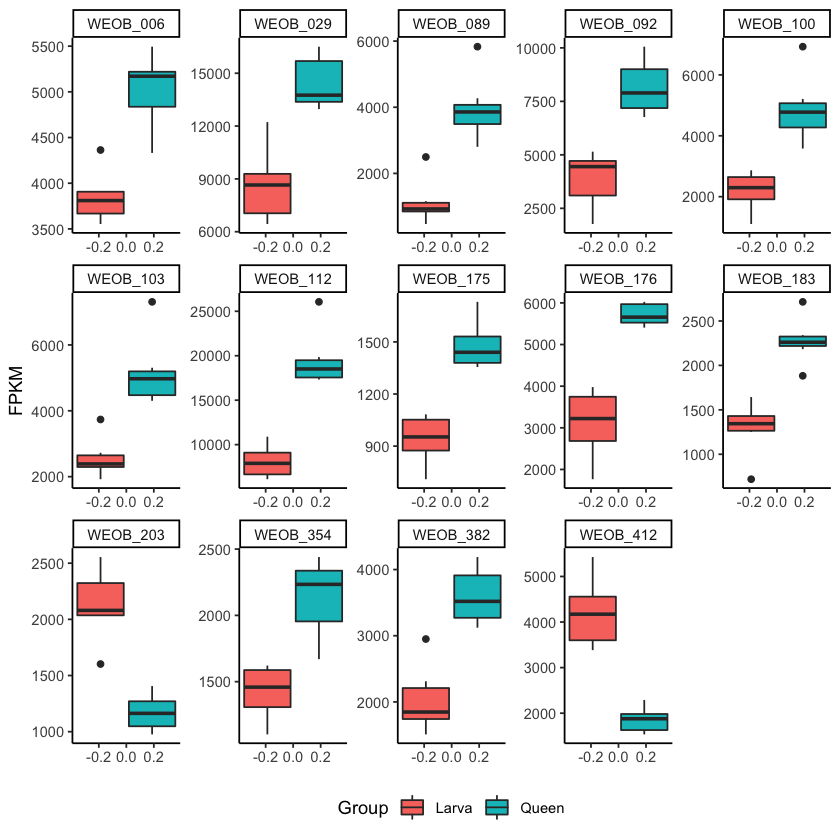

In [8]:
ggplot(data=long.df.fpkm.significant)+                     # initiate the plot and use the data frame df as the input data for plotting       
    geom_boxplot(aes(fill=Group,y=value))+                 # generate boxplots and plot the FPKM value on the y-axis and fill the boxplots with a different colors for Larva and Queen
    facet_wrap(~gene,scales="free",nrow=3)+                # show one boxplot for each of the 14 significant genes
    theme_classic()+                                       # choose the general design of the plot
    theme(legend.position = "bottom")+                     # define where the legend should be plotted
    ylab("FPKM")                                           # change the label at the y-axis to "FPKM"

The code below will generate the same plot for the 14 randomly selected genes. If you compare the boxplots for the significant and for the random genes, you see that only in the significant genes, there is a clear difference between queens and larvae. 

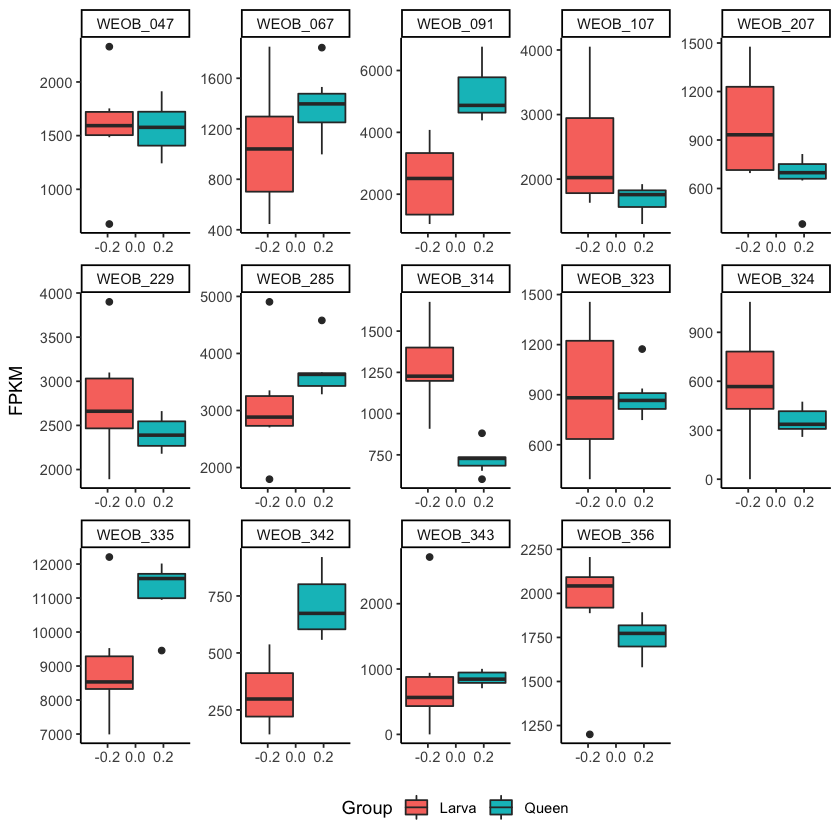

In [9]:
ggplot(long.df.fpkm.random)+
    geom_boxplot(aes(fill=Group,y=value))+
    facet_wrap(~gene,scales="free",nrow=3)+
    theme_classic()+
    theme(legend.position = "bottom")+
    ylab("FPKM")